## UFC Divisional Analysis

This notebook is an exploration of the UFC's weight divisions. Fans often debate which division is the strongest, and which is the weakest. I decided to look for answers in the data.

In [71]:
import json
import requests
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from matplotlib import rcParams

Data is from the UFC's official API

In [2]:
r = requests.get("http://ufc-data-api.ufc.com/api/v3/us/fighters")
contentStr = r.content
fighters = json.loads(contentStr)

In [3]:
def abbreviate_weight_class( weight_class ):
	if weight_class == "Flyweight":
		return "FLW"
	elif weight_class == "Bantamweight":
		return "BW"
	elif weight_class == "Featherweight":
		return "FW"
	elif weight_class == "Lightweight":
		return "LW"
	elif weight_class == "Welterweight":
		return "WW"
	elif weight_class == "Middleweight":
		return "MW"
	elif weight_class == "Light_Heavyweight":
		return "LHW"
	elif weight_class == "Heavyweight":
		return "HW"
	elif weight_class == "Women_Strawweight":
		return "WSW"
	elif weight_class == "Women_Flyweight":
		return "WFLW"
	elif weight_class == "Women_Bantamweight":
		return "WBW"
	elif weight_class == "Women_Featherweight":
		return "WFW"
	else:
		return "Weightless"

I decided upon win-rate as an important metric of fighters - wins over total fights. 

In [4]:
def calculate_win_rate ( fighter ):
	win_rate = float(fighter['wins']) / (fighter['wins'] + fighter['losses'] + fighter['draws'])
	return round(win_rate, 3)

Gather relevant for all fighters, as well as ranked fighters specifically. A few fighters returned from the API had malformed names.

In [5]:
rankedFighters = []
allFighters = []
malformedFighterInfoCount = 0
for fighter in fighters:
	try:
		fighterInfo = {
			'name': fighter['first_name'] + ' ' + fighter['last_name'],
			'wins': fighter['wins'],
			'losses': fighter['losses'],
			'draws': fighter['draws'],
			'win_rate': calculate_win_rate(fighter),
			'weight_class': abbreviate_weight_class(fighter['weight_class']),
			'rank': fighter['rank']
		}

		allFighters.append(fighterInfo)
		if fighter['rank']:
			rankedFighters.append(fighterInfo)
	# ~10 listings contain bogus data from fighters, i.e. first_name = 'TBD', last_name = None
	except:
		malformedFighterInfoCount += 1

In [6]:
dfRankedFighters = pd.DataFrame(rankedFighters)
dfAllFighters = pd.DataFrame(allFighters)

In [7]:
weightClassOrder = ["FLW", "BW", "FW", "LW", "WW", "MW", "LHW", "HW", "WSW", "WFLW", "WBW", "WFW"]

First is a visualization all UFC fighters' win rates by weight class.

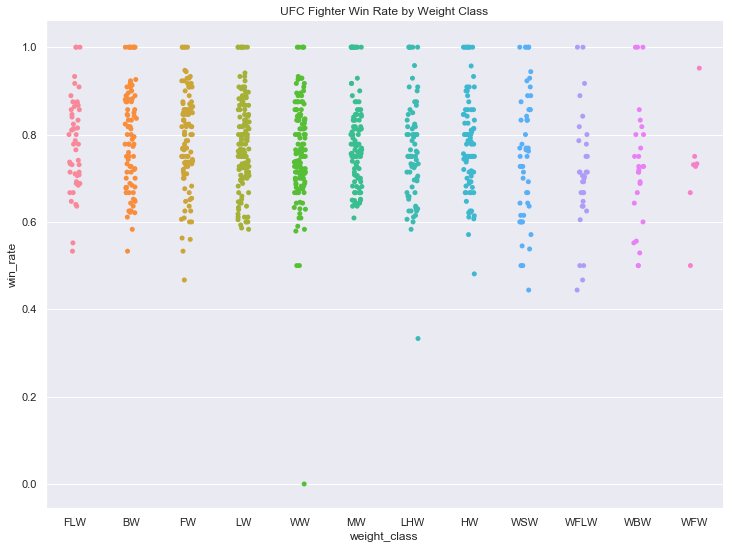

In [72]:
p = sea.catplot(x="weight_class", y="win_rate", data=dfAllFighters, order=weightClassOrder)
p.fig.set_size_inches(11.7,8.27)
plt.title('UFC Fighter Win Rate by Weight Class')
plt.show()

Wait, is that a win-rate of zero? I debugged this for a while only to find out that this data point was CM Punk. For the uninitiated, CM Punk is a WWE wrestler with no athletic background who was let into the UFC with 0 MMA fights. Needless to say, he was beaten handedly in two UFC fights, and made for quite the anomaly in this data set.

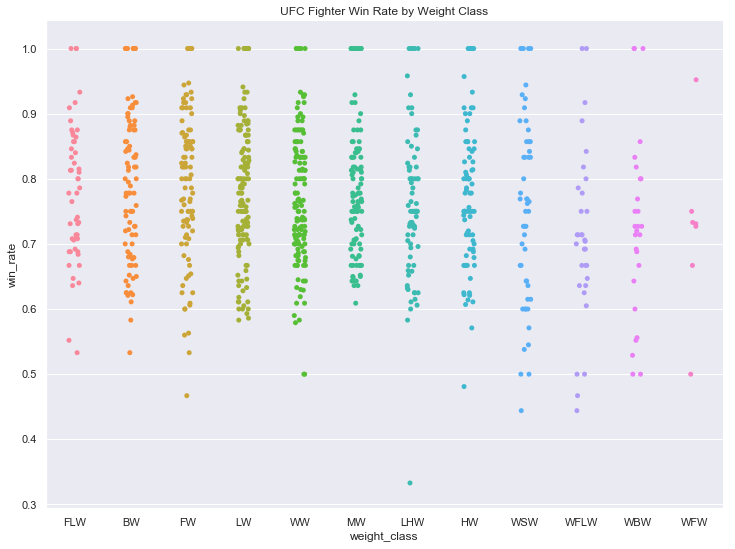

In [73]:
dfNotCmPunk = dfAllFighters[dfAllFighters['name'] != 'CM Punk']
p = sea.catplot(x="weight_class", y="win_rate", data=dfNotCmPunk, order=weightClassOrder)
p.fig.set_size_inches(11.7,8.27)
plt.title('UFC Fighter Win Rate by Weight Class')
plt.show()

Alright, that's better. There are clear differences between the divions' win-rates. Middleweight and Lightweight stand out as divisions without any fighters who are clearly separated from the pack.

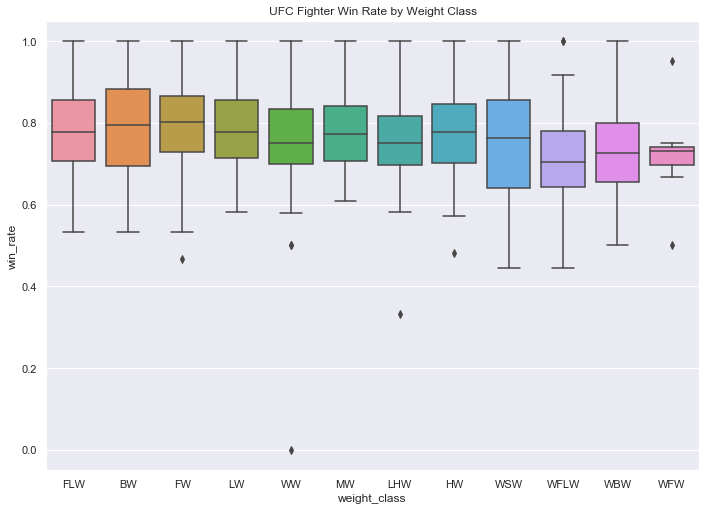

In [74]:
rcParams['figure.figsize'] = 11.7,8.27
p = sea.boxplot(x="weight_class", y="win_rate", data=dfAllFighters, order=weightClassOrder)
p.set_title("UFC Fighter Win Rate by Weight Class")
plt.show()

Featherweight, bantamweight, lightweight, and middleweight are the divisions with the highest average win-rates. No surprises there. The women's divisions have the highest ranges in win-rates, especially between their top and bottom quartiles. Again, no surprises there, as these divisions haven't been around nearly as long, and the talent pool is only beginning to grow relative to the men's divisions.

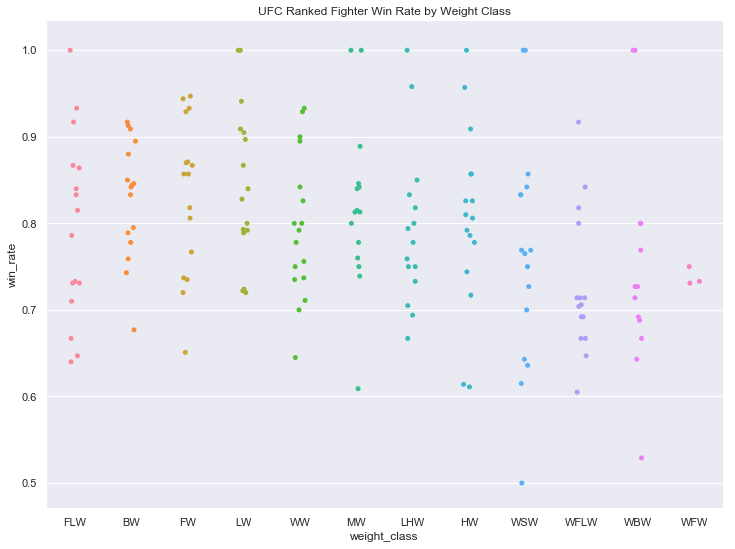

In [75]:
p = sea.catplot(x="weight_class", y="win_rate", data=dfRankedFighters, order=weightClassOrder)
p.fig.set_size_inches(11.7,8.27)
plt.title('UFC Ranked Fighter Win Rate by Weight Class')
plt.show()

Now looking at ranked fighters by division, Lightweight really stands out. Not only do they have a couple of fighters near 100% win rate (Khabib being undefeated), but Lightweight has the highest low. No ranked Lightweight has below a 70% win-rate, which no other division can say. It's also odd that only two women's featherweights are ranked, but that's a complicated situation for another day.

In [12]:
dfChampions = dfRankedFighters[dfRankedFighters['rank'] == 'C']

In [13]:
dfChampions = dfChampions.append(dfRankedFighters[dfRankedFighters['name'] == 'Daniel Cormier'])

In [ ]:
temp = dfRankedFighters[dfRankedFighters['name'] == 'Amanda Nunes']
temp['weight_class'] = 'WFW'
dfChampions = dfChampions.append(temp)

Now let's look at UFC champions. For some reason, Daniel Cormier was ranked one instead of champion, and Amanda Nunes was only shown as Bantamweight champion, though she's also Featherweight champion. I manually fixed these obvious cases, but it makes me wonder if anything else is incorrect with this dataset.

Text(0.5,1,'UFC Champion Win Rate by Weight Class')

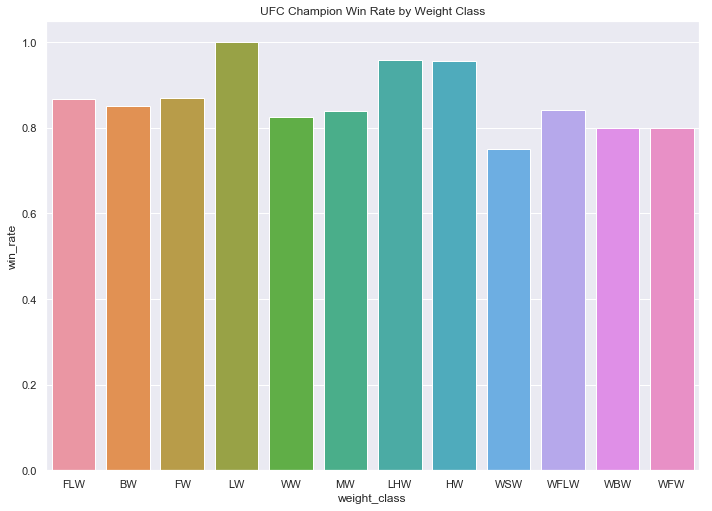

In [76]:
p = sea.barplot(x="weight_class", y="win_rate", data=dfChampions, order=weightClassOrder)
p.set_title("UFC Champion Win Rate by Weight Class")

Khabib Nurmagomedov is the undefeated Lightweight champion in this visual - a feat that is unheard of in MMA. Both Jon Jones at Light Heavyweight and Daniel Cormier at Heavyweight have notable win-rates among UFC champions as well.

## Conclusion

Looking at the divisions by win-rate, the data supports Lightweight being the strongest division. A high average win-rate among ranked fighters, no ranked fighters with anomalously low win-rates, and an undefeated champion. This is only a brief analysis using one metric to define fighter success and divisional depth. I hope to continue this analysis by investigating other aspects of MMA. 

Quesions include: 
    - Which fighters are gaining momentum?
    - In what ways are the UFC rankings biased?
    - Have certain divisions stagnated?